### **Select the Right Threshold value using ROC Curve**
### **How To Find Optimal Threshold For Binary Classification**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [25]:
# Create data
# n_samples - number of records
# n_features - not mentioned here. Default is 20
# n_classes - output class. here 2 that means 0 and 1
# weights - 1,1 means balanced dataset.

from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [26]:
X.shape

(2000, 20)

In [27]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### **Random Forests**

In [30]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9794833333333333


In [31]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.31, 0.69]])

####**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### **Adaboost Classifier**

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### **KNNClassifier**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### **Now we will focus on selecting the best threshold for maximum accuracy**

In [35]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))

#concatinating the pred values for each model column wise and finding the mean row wise
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9847333333333333


In [36]:
pred

[0      1.00
 1      0.01
 2      0.97
 3      0.92
 4      0.58
        ... 
 595    0.00
 596    0.01
 597    0.99
 598    0.04
 599    0.99
 Length: 600, dtype: float64, 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64, 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64, 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [37]:
pd.concat(pred,axis=1)

,0,1,2,3
0,1.00,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.58,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.04,0.001147,0.441720,0.2


In [38]:
final_prediction

0      0.887762
1      0.118323
2      0.818783
3      0.747853
4      0.562447
         ...   
595    0.121340
596    0.112845
597    0.876697
598    0.170717
599    0.834857
Length: 600, dtype: float64

#### **Calculate the ROC Curve**

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90922166, 0.90827475, 0.80493823,
       0.8030558 , 0.79748136, 0.79662833, 0.78637064, 0.78571156,
       0.77485188, 0.77287124, 0.72729835, 0.72637362, 0.71951656,
       0.71893711, 0.66768151, 0.66243537, 0.5915152 , 0.58925354,
       0.58406376, 0.57986186, 0.57827749, 0.57050386, 0.55558969,
       0.55389283, 0.55338469, 0.54969563, 0.54105932, 0.50116892,
       0.4496034 , 0.37155357, 0.36629719, 0.34745613, 0.34586612,
       0.2321341 , 0.22396893, 0.22396234, 0.22390421, 0.19916474,
       0.19348417, 0.12045384, 0.1203351 , 0.10648508])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.449603,0.961667
29,0.501169,0.958333
28,0.541059,0.958333
27,0.549696,0.958333
25,0.553893,0.958333


In [41]:
accuracy_ls

,thresholds,accuracy
30,0.449603,0.961667
29,0.501169,0.958333
28,0.541059,0.958333
27,0.549696,0.958333
25,0.553893,0.958333
26,0.553385,0.956667
24,0.555590,0.956667
20,0.584064,0.951667
23,0.570504,0.951667
21,0.579862,0.951667


In [42]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

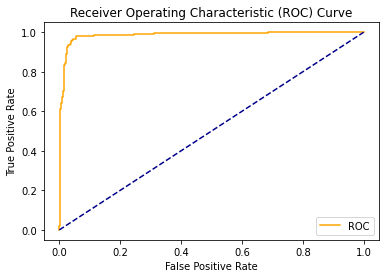

In [43]:
plot_roc_curve(fpr,tpr)